In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

In [2]:
%config Completer.use_jedi = False

# BATMAN 
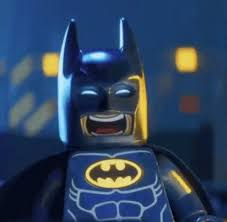

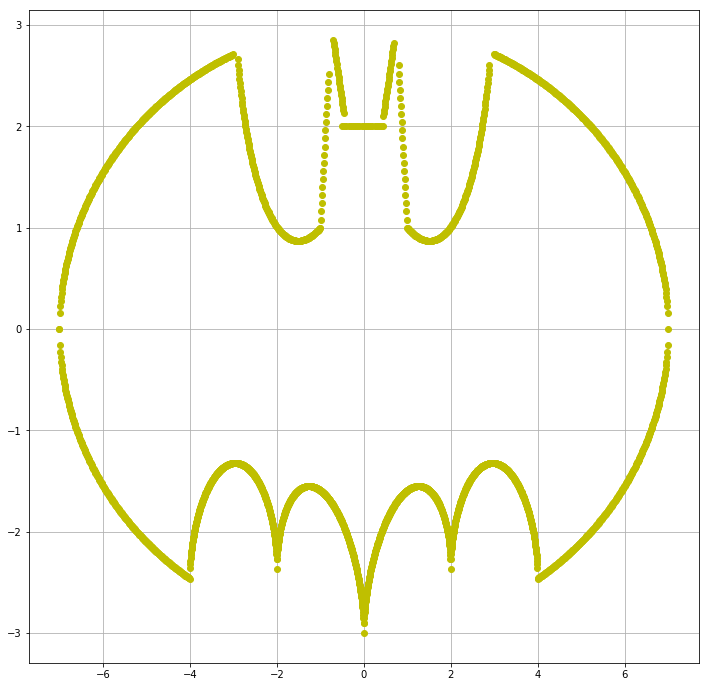

In [3]:
import math
Y = np.arange(-4,4,.005)
X = np.zeros((0))
for y in Y:
    X = np.append(X,abs(y/2)- 0.09137*y**2 + math.sqrt(1-(abs(abs(y)-2)-1)**2) -3)
  
Y1 = np.append(np.arange(-7,-3,.01), np.arange(3,7,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 3*math.sqrt(-(y/7)**2+1))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-7.,-4,.01), np.arange(4,7.01,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, -3*math.sqrt(-(y/7)**2+1))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-1,-.8,.01), np.arange(.8, 1,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 9-8*abs(y))
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.arange(-.5,.5,.05)
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1,2)
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-2.9,-1,.01), np.arange(1, 2.9,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 1.5 - .5*abs(y) - 1.89736*(math.sqrt(3-y**2+2*abs(y))-2) )
X = np.append(X,X1)
Y = np.append(Y, Y1)
Y1 = np.append(np.arange(-.7,-.45,.01), np.arange(.45, .7,.01))
X1 = np.zeros((0))
for y in Y1:
  X1 = np.append(X1, 3*abs(y)+.75)
X = np.append(X,X1)
Y = np.append(Y, Y1)

plt.figure(figsize=(12,12))
plt.plot(Y,X, 'yo')
plt.grid()
plt.show()

 ## Lets add some noise

Text(0,0.5,'x1')

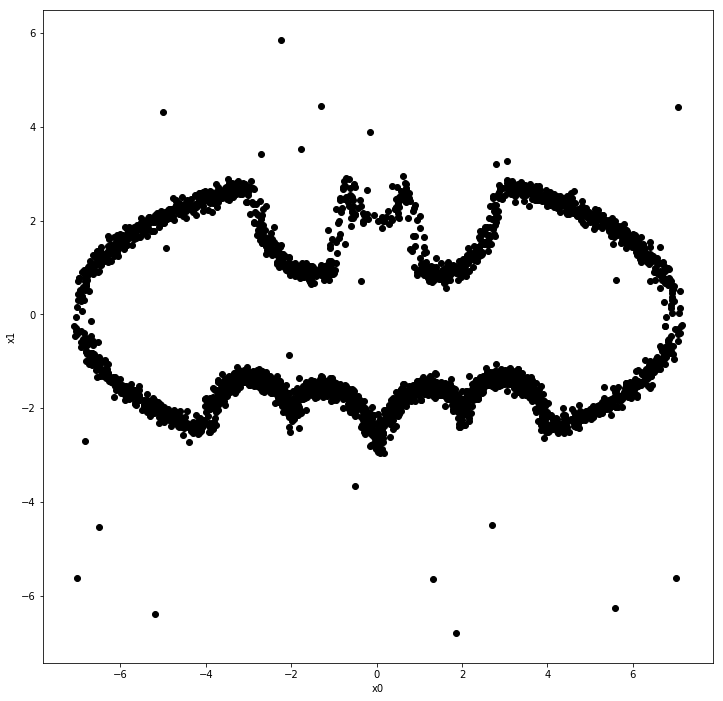

In [4]:
Y_norm=Y+np.random.normal(loc=0,scale=0.1,size=Y.shape)
X_norm = X+np.random.normal(loc=0,scale=0.1,size=X.shape)

df = np.concatenate([Y_norm.reshape(-1,1),X_norm.reshape(-1,1)],axis=1)
df= np.concatenate([df,np.random.uniform(df.min(), df.max(),size=[30,2])],axis=0)
negative_df = np.random.uniform(df.min(axis=0), df.max(axis=0),size=(df.shape[0],df.shape[1]))

plt.figure(figsize=(12,12))
plt.scatter(df[:,0],df[:,1],color='black')
plt.xlabel('x0')
plt.ylabel('x1')

 ## Negative sample

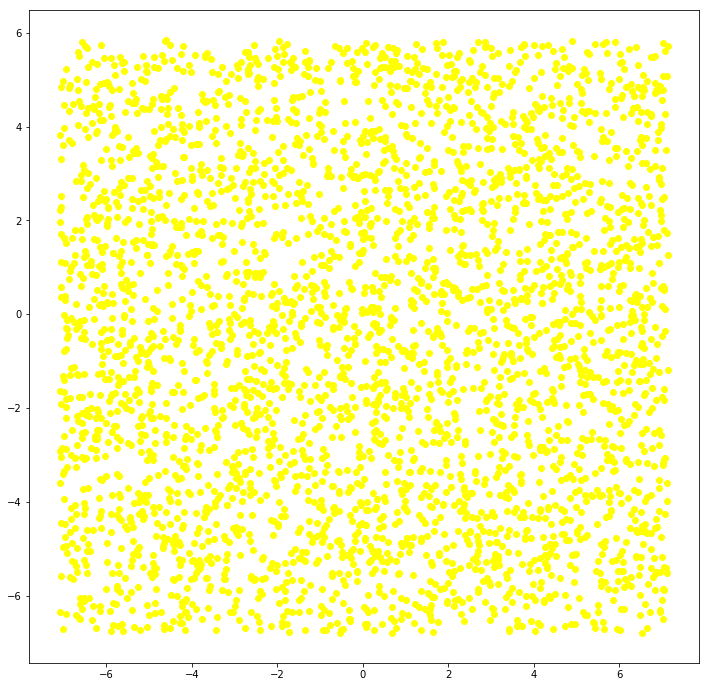

In [5]:
plt.figure(figsize=(12,12))
plt.scatter(negative_df[:,0],negative_df[:,1],color='yellow')

 ## Dodajmy szumu

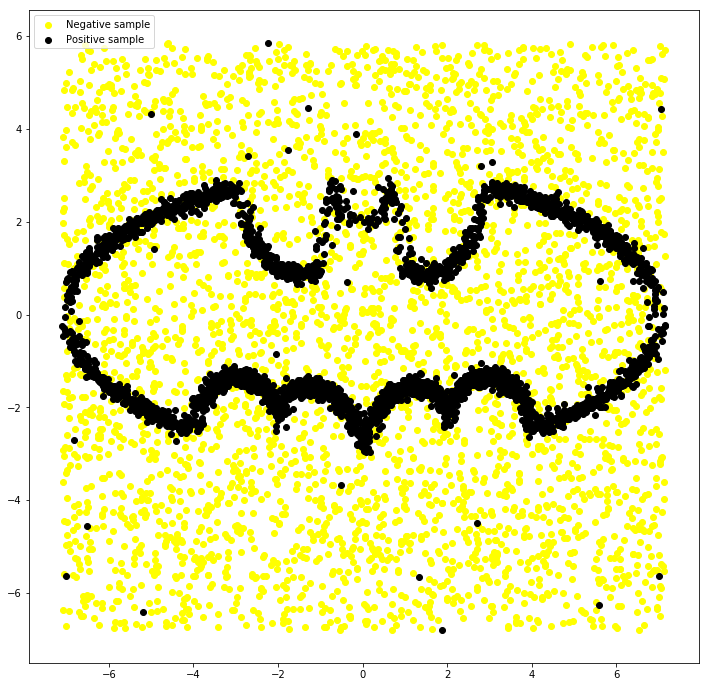

In [6]:
plt.figure(figsize=(12,12))
plt.scatter(negative_df[:,0],negative_df[:,1],color='yellow',label='Negative sample')
plt.scatter(df[:,0],df[:,1],color='black',label='Positive sample')
plt.legend()


In [7]:
X_n_p = np.concatenate([df,negative_df],axis=0)
y_n_p = np.concatenate([np.zeros(df.shape[0]),np.ones(negative_df.shape[0])],axis=0)

## A model

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
keras.backend.clear_session()
tf.random.set_seed(44)
np.random.seed(44)
model = keras.models.Sequential(
    [
keras.layers.Dense(512, activation="relu"),
  
keras.layers.Dense(256, activation="relu"),

keras.layers.Dense(128, activation="relu"),

keras.layers.Dense(64, activation="relu"),
keras.layers.Dense(32, activation="relu"),
keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(8, activation="relu"),
keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
model.fit(X_n_p,y_n_p,epochs=200, batch_size=512)

Train on 7042 samples
Epoch 1/200
7042/7042 [==============================] - 1s 195us/sample - loss: 0.6765 - accuracy: 0.4969
Epoch 2/200
7042/7042 [==============================] - 1s 81us/sample - loss: 0.6216 - accuracy: 0.5368
Epoch 3/200
7042/7042 [==============================] - 1s 80us/sample - loss: 0.5796 - accuracy: 0.6377
Epoch 4/200
7042/7042 [==============================] - 1s 83us/sample - loss: 0.5095 - accuracy: 0.7329
Epoch 5/200
7042/7042 [==============================] - 1s 74us/sample - loss: 0.4672 - accuracy: 0.7440
Epoch 6/200
7042/7042 [==============================] - 1s 77us/sample - loss: 0.4354 - accuracy: 0.7685
Epoch 7/200
7042/7042 [==============================] - 1s 80us/sample - loss: 0.4289 - accuracy: 0.8035
Epoch 8/200
7042/7042 [==============================] - 1s 77us/sample - loss: 0.4160 - accuracy: 0.8179
Epoch 9/200
7042/7042 [==============================] - 1s 76us/sample - loss: 0.4007 - accuracy: 0.8356
Epoch 10/200
7042/7042 

7042/7042 [==============================] - 1s 81us/sample - loss: 0.2368 - accuracy: 0.9130
Epoch 78/200
7042/7042 [==============================] - 1s 89us/sample - loss: 0.2348 - accuracy: 0.9128
Epoch 79/200
7042/7042 [==============================] - 1s 76us/sample - loss: 0.2422 - accuracy: 0.9093
Epoch 80/200
7042/7042 [==============================] - 1s 89us/sample - loss: 0.2440 - accuracy: 0.9085
Epoch 81/200
7042/7042 [==============================] - 0s 68us/sample - loss: 0.2425 - accuracy: 0.9134
Epoch 82/200
7042/7042 [==============================] - 1s 73us/sample - loss: 0.2453 - accuracy: 0.9087
Epoch 83/200
7042/7042 [==============================] - 1s 74us/sample - loss: 0.2747 - accuracy: 0.8970
Epoch 84/200
7042/7042 [==============================] - 1s 73us/sample - loss: 0.2488 - accuracy: 0.9084
Epoch 85/200
7042/7042 [==============================] - 1s 80us/sample - loss: 0.2345 - accuracy: 0.9139
Epoch 86/200
7042/7042 [==========================

7042/7042 [==============================] - 1s 73us/sample - loss: 0.2085 - accuracy: 0.9245
Epoch 154/200
7042/7042 [==============================] - 1s 73us/sample - loss: 0.2235 - accuracy: 0.9186
Epoch 155/200
7042/7042 [==============================] - 0s 66us/sample - loss: 0.2159 - accuracy: 0.9219
Epoch 156/200
7042/7042 [==============================] - 1s 72us/sample - loss: 0.2229 - accuracy: 0.9176
Epoch 157/200
7042/7042 [==============================] - 0s 66us/sample - loss: 0.2201 - accuracy: 0.9206
Epoch 158/200
7042/7042 [==============================] - 1s 77us/sample - loss: 0.2151 - accuracy: 0.9213
Epoch 159/200
7042/7042 [==============================] - 1s 80us/sample - loss: 0.2102 - accuracy: 0.9264
Epoch 160/200
7042/7042 [==============================] - 1s 80us/sample - loss: 0.2133 - accuracy: 0.9239
Epoch 161/200
7042/7042 [==============================] - 1s 75us/sample - loss: 0.2109 - accuracy: 0.9250
Epoch 162/200
7042/7042 [=================

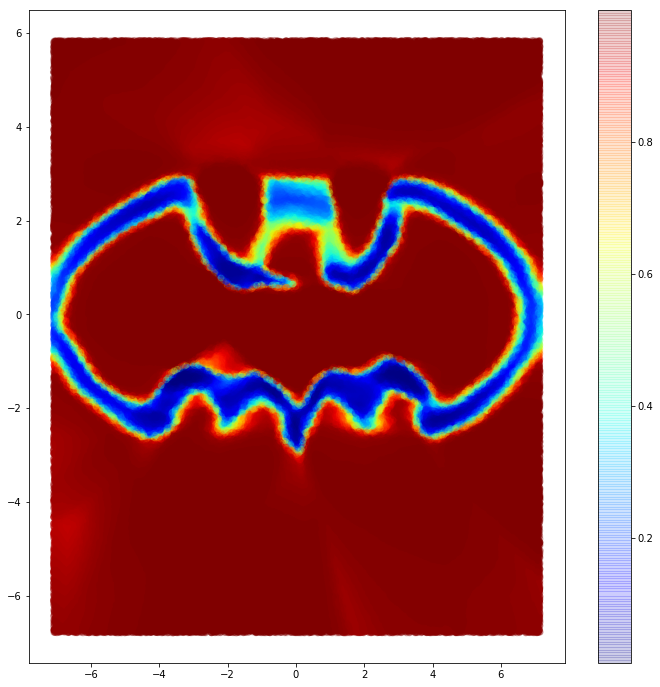

In [11]:
negative_df_test = np.random.uniform(df.min(axis=0), df.max(axis=0),size=(df.shape[0]*100,df.shape[1]))
p = model.predict(negative_df_test, batch_size=2048)

plt.figure(figsize=(12,12))
plt.scatter(negative_df_test[:,0],negative_df_test[:,1],c=p[:,0],cmap='jet',alpha=0.2)
plt.colorbar()

# Energy Function

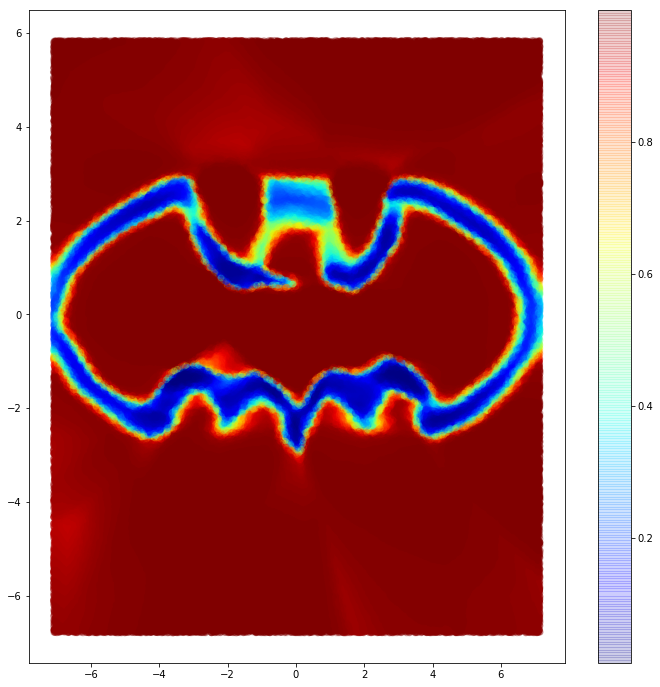

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(negative_df_test[:,0],negative_df_test[:,1],c=p[:,0],cmap='jet',alpha=0.2)
plt.colorbar()

# Anomaly detection

In [16]:
df

array([[-4.08996753, -2.35671094],
       [-3.93153725, -2.31555831],
       [-4.01062217, -2.29999912],
       ...,
       [ 2.72091774,  2.52119037],
       [-0.14682031,  3.88780744],
       [ 7.00384196, -5.62352486]])

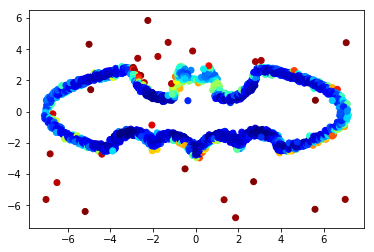

In [17]:
p = model.predict(df)
plt.scatter(df[:,0],df[:,1],c=p[:,0],cmap='jet')